0. Review
1. Classifying Muffins and Cupcakes with SVM
2. Classifying Labeled Images with SVM

## Linear SVM  Classification
![SVM](http://www.bogotobogo.com/python/scikit-learn/images/svm/SVM-Hyperplane-Maximizing-Margin.png)
- svm은 마진을 최대가 되도록 하는 알고리즘
- 마진은 클래스를 분류하기 위한 경계선과 경계선에서 제일 가까운 데이터 사이의 거리를 말함
- 경계선과 제일 가까운 데이터들을 서포트 벡터라함
- http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

**Classifying Muffins and Cupcakes with SVM**

Step 1: Import Packages

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

Step 2: Import Data

In [3]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


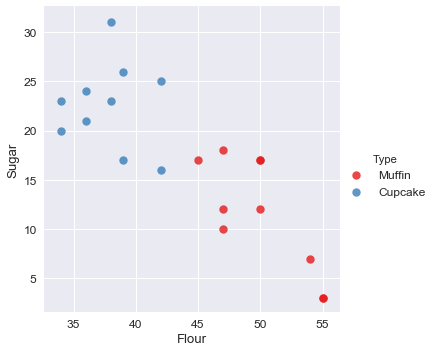

In [4]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [5]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [6]:
recipes[['Flour','Sugar']].as_matrix()

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]], dtype=int64)

__Step 4:__ Fit the Model

In [7]:
# Fit the SVM model
model = svm.SVC(kernel='linear') # classifier(분류기) 객체 'model'
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

__Step 5:__ Visualize Results

In [8]:
# Get the separating hyperplane
w = model.coef_[0] # w==Theta
a = -w[0] / w[1] # decision boundary의 기울기

xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


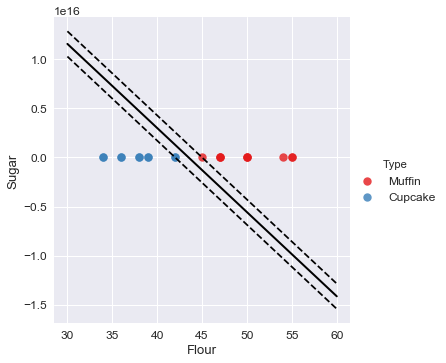

In [11]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1], s=80,facecolors='none')





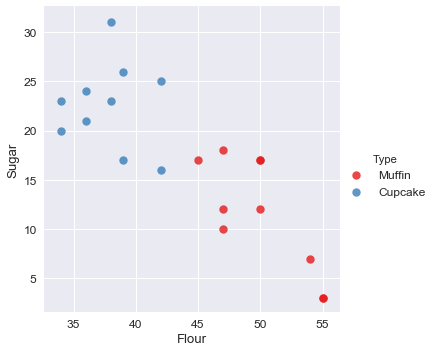

In [12]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

__Step 6:__ Predict New Case

In [13]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [14]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


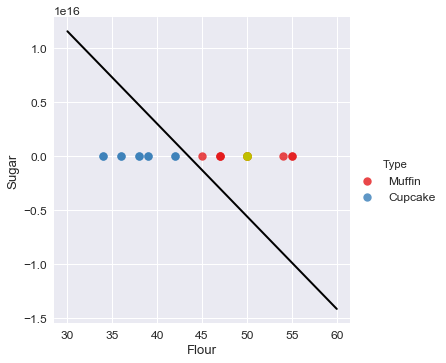

In [15]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

Classifying Labeled Images with SVM

In [16]:
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from scipy.ndimage.filters import gaussian_filter


In [17]:
labeled_images = pd.read_csv('train.csv')

In [18]:
images = labeled_images.iloc[0:5000,1:] #0~255의 pixel값으로 이루어짐
labels = labeled_images.iloc[0:5000,:1]


In [19]:
images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
labels.head()

,label
0,1
1,0
2,1
3,4
4,0


In [38]:
images.iloc[:5]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
images.loc[:5]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
img = images.iloc[0].as_matrix() # to numpy.ndarray

img = img.reshape((28,28)) #since 28*28 = 784


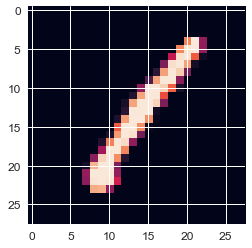

In [27]:
plt.imshow(img)

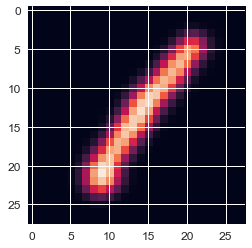

In [28]:
img = gaussian_filter(img, sigma = 1)
#가우시안 필터 : 이미지 처리에서 가우시안 분포를 이용한 잡음 제거에 사용
#sigma 값에 따라 스무딩 정도 변화
plt.imshow(img)

In [21]:
for i in range(images.shape[0]): #0~4999
    img = images.iloc[i].as_matrix()
    img = img.reshape((28,28))
    img = gaussian_filter(img, sigma = 1)
    img = img.reshape(784,1)
    images.iloc[i].as_matrix = img

In [24]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8, random_state = 0)

C:\Users\Chankoo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [34]:
train_images.iloc[0,234:237]

pixel234    238
pixel235     59
pixel236      0
Name: 2913, dtype: int64

In [25]:
#밑에꺼 왜함??
#1을 기준으로 각 픽셀의 값을 이진화
test_images[test_images<1]=0
test_images[test_images>=1]=1
train_images[train_images<1]=0
train_images[train_images>=1]=1

#다른 방법 1. 픽셀의 scale로 나눠 0~1사이값 갖게함
#test_images/=255
#train_images/=255
#이 때 정확도 0.883

#다른 방법2. StandardScaler 이용 정규화

C:\Users\Chankoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Chankoo\Anaconda3\lib\site-packages\pandas\core\frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\Chankoo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

label    3
Name: 4619, dtype: int64


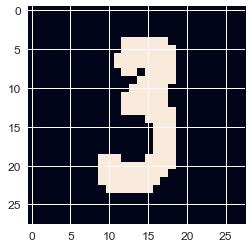

In [50]:
print(train_labels.iloc[6])
img = train_images.iloc[6].as_matrix()
img = img.reshape((28,28))
plt.imshow(img)

In [51]:
clf = svm.SVC() 
#SVC : svm을 통한 classification
#default kernel = rbf
clf.fit(train_images, train_labels.values.ravel())
#.values.ravel : dataframe 배열을 어레이로 변환후 연속 병합
clf.score(test_images,test_labels)

0.887

In [18]:
#clf = svm.SVC(kernel='poly')
#clf.fit(train_images, train_labels.values.ravel())
#clf.score(test_images,test_labels)

In [28]:
#StandardScaler 이용 정규화
#정규화 어떤방식으로??
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(images)
images = scaler.transform(images)
#정규화 인스턴스 생성 -> 계산 -> 계산값 대입(numpy array)

In [29]:
images[0,230:300]

array([-0.29356401, -0.40077641, -0.52620832, -0.67415008, -0.84519777,
       -1.00857995, -1.1026549 , -1.11887107, -1.10783585, -1.09229546,
       -0.83708276,  0.78350314,  1.26291114,  1.26781376,  0.01689505,
       -0.56927372, -0.42719264, -0.29739026, -0.19161312, -0.11483379,
       -0.05472419, -0.01414355,  0.        , -0.01999304, -0.04602412,
       -0.08770641, -0.1548896 , -0.22916784, -0.32470517, -0.43697711,
       -0.58004364, -0.74570986, -0.91458221, -1.02016096, -1.01286002,
       -0.95704354, -0.89677016, -0.41120713,  0.96094876,  1.30584751,
        1.32111585, -0.07306728, -0.72854874, -0.57082748, -0.4236885 ,
       -0.28710485, -0.18258226, -0.11008312, -0.04984311, -0.01480042,
        0.        , -0.02027602, -0.05393551, -0.09337451, -0.15374411,
       -0.22703033, -0.32659159, -0.45338146, -0.62107606, -0.78539692,
       -0.93313362, -0.95840446, -0.87790841, -0.7891138 ,  0.15367283,
        1.61385625,  1.47365705,  1.22866967,  0.6082922 , -0.69

In [30]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, train_size = 0.8, random_state = 0)

C:\Users\Chankoo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
import time

In [56]:
start_time = time.time()
clf = svm.SVC(kernel = 'rbf') 
#default gamma : auto(1/n features)
clf.fit(train_images, train_labels.values.ravel())
print(clf.score(test_images,test_labels))
print('Running Time : %0.5f' % (time.time() - start_time))


0.912
Running Time : 21.54635


In [37]:
start_time = time.time()
clf = svm.SVC(kernel = 'linear') 
#default c : 1.0
clf.fit(train_images, train_labels.values.ravel())
print(clf.score(test_images,test_labels))
print('Running Time : %0.5f' % (time.time() - start_time))

0.91
Running Time : 10.25729


In [94]:
start_time = time.time()
clf = svm.LinearSVC()
#선형 분류에 특화, 짧은 실행시간?
clf.fit(train_images, train_labels.values.ravel())
print(clf.score(test_images,test_labels))
print('Running Time : %0.5f' % (time.time() - start_time))

0.8
Running Time : 17.08645


In [96]:
start_time = time.time()
clf = svm.NuSVC(kernel='linear')
#비선형 분류, SVC와 비슷하나 오류 처리 방법 차이
#시간 가장 오래 걸리나 정확
#default 값들 SVC와 동일
clf.fit(train_images, train_labels.values.ravel())
print(clf.score(test_images,test_labels))
print('Running Time : %0.5f' % (time.time() - start_time))

0.864
Running Time : 54.21717


In [31]:
#cross-validation; take some time
from sklearn.cross_validation import cross_val_score
svc = svm.SVC(kernel='rbf')
scores = cross_val_score(svc, train_images, train_labels.values.ravel(), cv = 10, scoring = 'accuracy')
print(scores)
print(scores.mean())

[0.91336634 0.90547264 0.9127182  0.935      0.96       0.9122807
 0.90726817 0.92230576 0.88944724 0.92964824]
0.9187507291916773


In [32]:
#cross-validation + error term c값 변화
#c값 : svm 식에서 penalty parameter(soft margin)
#얼마나 많은 데이터 샘플이 다른 클래스에 놓이는지를 허용?
C_range = [1,10,100,1000]
acc_score = []
for c in C_range : 
    svc = svm.SVC(kernel='rbf', C=c)
    scores = cross_val_score(svc, train_images, train_labels.values.ravel(), cv = 10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.9187507291916773, 0.9319942445106724, 0.9319923741631617, 0.9319923741631617]


Text(0,0.5,'Cross-Validated Accuracy')

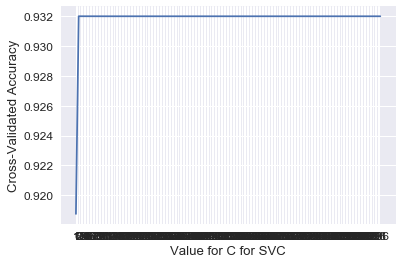

In [33]:
import numpy as np
plt.plot(C_range, acc_score)
plt.xticks(np.arange(1,1000,5)) #x축 범위, 구간 지정
plt.xlabel('Value for C for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
#cross validation + rbf kernel gamma값 변화
#gamma 값 : 결정 경계의 곡률 결정
gamma_range = [0.0001,0.001,0.01,0.1]
acc_score = []
for g in gamma_range :
    svc = svm.SVC(kernel='rbf', gamma = g)
    scores = cross_val_score(svc, train_images, train_labels.values.ravel(), cv = 10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

In [ ]:
plt.plot(gamma_range, acc_score)
plt.xlabel('Value of gamma for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
#cross validation + polynomial kernel degree값 변화
#degree : 차수
degree = [3,4,5,6]
acc_score = []
for d in degree:
    svc = svm.SVC(kernel='poly',degree=d)
    scores = cross_val_score(svc, train_images, train_labels.values.ravel(), cv = 10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

In [ ]:
plt.plot(degree, acc_score, color='r')
plt.xlabel('degrees for SVC')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
#Grid Search : 최적의 parameter 찾기
tuned_parameters = {
 'C': [10, 100] , 'kernel': ['linear'],
 'C': [10, 100] , 'gamma': [0.0005,0.001,0.0015], 'kernel': ['rbf'],
 #'degree': [2,3] ,'gamma':[0.0005,0.001,0.0015], 'C':[10, 100] , 'kernel':['poly']
                   }

In [ ]:
from sklearn.grid_search import GridSearchCV

svm_model = svm.SVC()
model_svm = GridSearchCV(svm_model,tuned_parameters,cv=10,scoring='accuracy')
model_svm.fit(train_images, train_labels.values.ravel())
print(model_svm.best_score_)
print(model_svm.best_params_)

In [ ]:
from sklearn import metrics
pred_labels = model_svm.predict(test_images)
print(metrics.accuracy_score(pred_labels,test_labels))

SVM을 이용한 Regression

In [ ]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [ ]:
#데이터 생성
#임의의 x값과 그에 해당하는 sin값을 y로
X = np.sort(5 * np.random.rand(40,1), axis = 0)
y = np.sin(X).ravel()
#y값에 noise 생성
y[::5] += 3 * (0.5 - np.random.rand(8))

In [ ]:
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C=1e3)
svr_poly = SVR(kernel = 'poly', C=1e3,degree=2)
#각 kernel로 계산한 x의 예측값 저장
y_rbf = svr_rbf.fit(X,y).predict(X)
y_lin = svr_lin.fit(X,y).predict(X)
y_poly = svr_poly.fit(X,y).predict(X)

In [ ]:
#그래프 그리기
lw = 2 #line width
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


https://www.youtube.com/watch?v=N1vOgolbjSc

https://www.kaggle.com/saptarc/playing-with-svm